In [1]:
import requests
from bs4 import BeautifulSoup
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#scrape a single game shots. We will allow users to enter a base url
base_url = 'https://understat.com/player/'
match = str(input('Please enter the player id: '))
url = base_url+match

Please enter the player id: 675


In [3]:
#Use requests to get the webpage and BeautifulSoup to parse the page
res = requests.get(url)
soup = BeautifulSoup(res.content, 'lxml')
scripts = soup.find_all('script')

In [4]:
#get only the shotsData
strings = scripts[3].string

In [5]:
strings

"\n\tvar shotsData \t= JSON.parse('\\x5B\\x7B\\x22id\\x22\\x3A\\x2217357\\x22,\\x22minute\\x22\\x3A\\x2295\\x22,\\x22result\\x22\\x3A\\x22SavedShot\\x22,\\x22X\\x22\\x3A\\x220.8480000305175781\\x22,\\x22Y\\x22\\x3A\\x220.6409999847412109\\x22,\\x22xG\\x22\\x3A\\x220.05638926848769188\\x22,\\x22player\\x22\\x3A\\x22Jack\\x20Grealish\\x22,\\x22h_a\\x22\\x3A\\x22a\\x22,\\x22player_id\\x22\\x3A\\x22675\\x22,\\x22situation\\x22\\x3A\\x22OpenPlay\\x22,\\x22season\\x22\\x3A\\x222014\\x22,\\x22shotType\\x22\\x3A\\x22RightFoot\\x22,\\x22match_id\\x22\\x3A\\x224685\\x22,\\x22h_team\\x22\\x3A\\x22Burnley\\x22,\\x22a_team\\x22\\x3A\\x22Aston\\x20Villa\\x22,\\x22h_goals\\x22\\x3A\\x221\\x22,\\x22a_goals\\x22\\x3A\\x221\\x22,\\x22date\\x22\\x3A\\x222014\\x2D11\\x2D29\\x2015\\x3A00\\x3A00\\x22,\\x22player_assisted\\x22\\x3Anull,\\x22lastAction\\x22\\x3A\\x22BlockedPass\\x22\\x7D,\\x7B\\x22id\\x22\\x3A\\x2219813\\x22,\\x22minute\\x22\\x3A\\x2283\\x22,\\x22result\\x22\\x3A\\x22BlockedShot\\x22,\\x22X\\

In [6]:
# strip unnecessary symbols and get only JSON data 
ind_start = strings.index("('")+2 
ind_end = strings.index("')") 
json_data = strings[ind_start:ind_end] 
json_data = json_data.encode('utf8').decode('unicode_escape')

#convert string to json format
data = json.loads(json_data)

In [7]:
data

[{'id': '17357',
  'minute': '95',
  'result': 'SavedShot',
  'X': '0.8480000305175781',
  'Y': '0.6409999847412109',
  'xG': '0.05638926848769188',
  'player': 'Jack Grealish',
  'h_a': 'a',
  'player_id': '675',
  'situation': 'OpenPlay',
  'season': '2014',
  'shotType': 'RightFoot',
  'match_id': '4685',
  'h_team': 'Burnley',
  'a_team': 'Aston Villa',
  'h_goals': '1',
  'a_goals': '1',
  'date': '2014-11-29 15:00:00',
  'player_assisted': None,
  'lastAction': 'BlockedPass'},
 {'id': '19813',
  'minute': '83',
  'result': 'BlockedShot',
  'X': '0.8480000305175781',
  'Y': '0.48200000762939454',
  'xG': '0.10319412499666214',
  'player': 'Jack Grealish',
  'h_a': 'h',
  'player_id': '675',
  'situation': 'OpenPlay',
  'season': '2014',
  'shotType': 'RightFoot',
  'match_id': '4607',
  'h_team': 'Aston Villa',
  'a_team': 'Leicester',
  'h_goals': '2',
  'a_goals': '1',
  'date': '2014-12-07 16:00:00',
  'player_assisted': 'Gabriel Agbonlahor',
  'lastAction': 'Cross'},
 {'id': '

In [8]:
x = []
y = []
xg = []
result = []
season = []

for i,_ in enumerate(data):
    for key in data[i]:
        if key=='X':
            x.append(data[i][key])
        if key=='Y':
            y.append(data[i][key])
        if key=='xG':
            xg.append(data[i][key])
        if key=='result':
            result.append(data[i][key])
        if key=='season':
            season.append(data[i][key])

In [9]:
col_names = ['x','y','xg','result','season']
df = pd.DataFrame([x,y,xg,result,season],index=col_names)
df = df.T

In [10]:
df.head()

,x,y,xg,result,season
0,0.8480000305175781,0.6409999847412109,0.05638926848769188,SavedShot,2014
1,0.8480000305175781,0.48200000762939454,0.10319412499666214,BlockedShot,2014
2,0.8480000305175781,0.7180000305175781,0.03184785321354866,MissedShots,2014
3,0.8780000305175781,0.5790000152587891,0.06304029375314713,SavedShot,2014
4,0.8090000152587891,0.7019999694824218,0.02542997896671295,BlockedShot,2014


In [11]:
df = df.apply(pd.to_numeric,errors='ignore')

In [12]:
df['x']=df['x']*100
df['y']=df['y']*100

In [13]:
df.tail()

,x,y,xg,result,season
147,89.500000,66.800003,0.083522,SavedShot,2020
148,84.699997,58.099998,0.076474,MissedShots,2020
149,76.500000,51.500000,0.028961,MissedShots,2020
150,78.099998,71.699997,0.017552,SavedShot,2020
151,86.199997,70.900002,0.025945,BlockedShot,2020


In [15]:
#scrape a single game shots. We will allow users to enter a base url
base_url = 'https://understat.com/player/'
match = str(input('Please enter the player id: '))
url = base_url+match

Please enter the player id: 6345


In [16]:
#Use requests to get the webpage and BeautifulSoup to parse the page
res = requests.get(url)
soup = BeautifulSoup(res.content, 'lxml')
scripts = soup.find_all('script')

In [17]:
#get only the shotsData
strings = scripts[3].string
strings

"\n\tvar shotsData \t= JSON.parse('\\x5B\\x7B\\x22id\\x22\\x3A\\x22168278\\x22,\\x22minute\\x22\\x3A\\x2289\\x22,\\x22result\\x22\\x3A\\x22SavedShot\\x22,\\x22X\\x22\\x3A\\x220.9740000152587891\\x22,\\x22Y\\x22\\x3A\\x220.6480000305175782\\x22,\\x22xG\\x22\\x3A\\x220.059525325894355774\\x22,\\x22player\\x22\\x3A\\x22Jadon\\x20Sancho\\x22,\\x22h_a\\x22\\x3A\\x22a\\x22,\\x22player_id\\x22\\x3A\\x226345\\x22,\\x22situation\\x22\\x3A\\x22OpenPlay\\x22,\\x22season\\x22\\x3A\\x222017\\x22,\\x22shotType\\x22\\x3A\\x22LeftFoot\\x22,\\x22match_id\\x22\\x3A\\x228336\\x22,\\x22h_team\\x22\\x3A\\x22Eintracht\\x20Frankfurt\\x22,\\x22a_team\\x22\\x3A\\x22Borussia\\x20Dortmund\\x22,\\x22h_goals\\x22\\x3A\\x222\\x22,\\x22a_goals\\x22\\x3A\\x222\\x22,\\x22date\\x22\\x3A\\x222017\\x2D10\\x2D21\\x2014\\x3A30\\x3A00\\x22,\\x22player_assisted\\x22\\x3A\\x22Jeremy\\x20Toljan\\x22,\\x22lastAction\\x22\\x3A\\x22Chipped\\x22\\x7D,\\x7B\\x22id\\x22\\x3A\\x22187992\\x22,\\x22minute\\x22\\x3A\\x2219\\x22,\\x22res

In [18]:
# strip unnecessary symbols and get only JSON data 
ind_start = strings.index("('")+2 
ind_end = strings.index("')") 
json_data = strings[ind_start:ind_end] 
json_data = json_data.encode('utf8').decode('unicode_escape')

#convert string to json format
data2 = json.loads(json_data)
data2

[{'id': '168278',
  'minute': '89',
  'result': 'SavedShot',
  'X': '0.9740000152587891',
  'Y': '0.6480000305175782',
  'xG': '0.059525325894355774',
  'player': 'Jadon Sancho',
  'h_a': 'a',
  'player_id': '6345',
  'situation': 'OpenPlay',
  'season': '2017',
  'shotType': 'LeftFoot',
  'match_id': '8336',
  'h_team': 'Eintracht Frankfurt',
  'a_team': 'Borussia Dortmund',
  'h_goals': '2',
  'a_goals': '2',
  'date': '2017-10-21 14:30:00',
  'player_assisted': 'Jeremy Toljan',
  'lastAction': 'Chipped'},
 {'id': '187992',
  'minute': '19',
  'result': 'MissedShots',
  'X': '0.9880000305175781',
  'Y': '0.605999984741211',
  'xG': '0.07154734432697296',
  'player': 'Jadon Sancho',
  'h_a': 'h',
  'player_id': '6345',
  'situation': 'OpenPlay',
  'season': '2017',
  'shotType': 'RightFoot',
  'match_id': '8412',
  'h_team': 'Borussia Dortmund',
  'a_team': 'Wolfsburg',
  'h_goals': '0',
  'a_goals': '0',
  'date': '2018-01-14 17:00:00',
  'player_assisted': 'Alexander Isak',
  'lastA

In [19]:
x = []
y = []
xg = []
result = []
season = []

for i,_ in enumerate(data2):
    for key in data2[i]:
        if key=='X':
            x.append(data2[i][key])
        if key=='Y':
            y.append(data2[i][key])
        if key=='xG':
            xg.append(data2[i][key])
        if key=='result':
            result.append(data2[i][key])
        if key=='season':
            season.append(data2[i][key])

In [20]:
col_names = ['x','y','xg','result','season']
df2 = pd.DataFrame([x,y,xg,result,season],index=col_names)
df2 = df2.T

In [21]:
df2 = df2.apply(pd.to_numeric,errors='ignore')
df2['x']=df2['x']*100
df2['y']=df2['y']*100
df2.tail()


,x,y,xg,result,season
149,91.300003,67.199997,0.084628,Goal,2020
150,94.900002,50.099998,0.631939,Goal,2020
151,76.500000,43.299999,0.025922,BlockedShot,2020
152,87.599998,67.000000,0.079460,SavedShot,2020
153,86.900002,48.099998,0.179000,BlockedShot,2020


In [22]:
from highlight_text import ax_text,fig_text
import mplsoccer
import matplotlib as mpl

In [23]:
background = '#000000'
text_color = 'white'
mpl.rcParams['xtick.color']=text_color
mpl.rcParams['ytick.color']=text_color
mpl.rcParams['text.color']=text_color
mpl.rcParams['font.family']='Georgia'
mpl.rcParams['legend.fontsize'] = 15

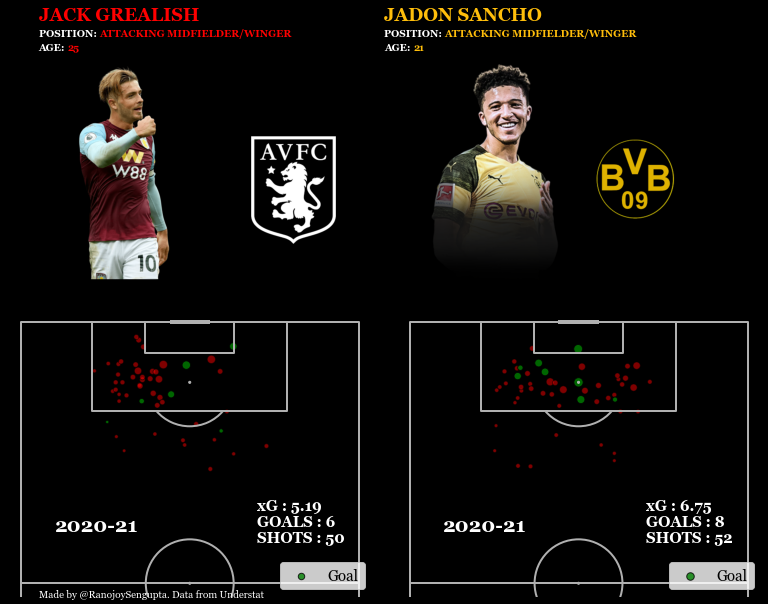

In [24]:
# SETTING UP THE AXES
fig, ax = plt.subplots(figsize=(12,10))
ax.axis('off')
fig.set_facecolor(background)

#SETTING UP THE MPL AXIS FOR JACK GREALISH
pitch = mplsoccer.VerticalPitch(half=True,pitch_type='opta',line_zorder=3,pitch_color='#000000')
ax_opta1 = fig.add_axes((0.05, 0.06, 0.45, 0.4))
ax_opta1.patch.set_facecolor(background)
pitch.draw(ax=ax_opta1)

#PLOTTING OTHER SHOTS
df_fil = df.loc[df['season']==2020]

pitch.scatter(df_fil[df_fil['result']!='Goal']['x'],df_fil[df_fil['result']!='Goal']['y'], 
              s=np.sqrt(df_fil[df_fil['result']!='Goal']['xg'])*100, marker='o', alpha=0.5,
              edgecolor='black', facecolor='red', ax=ax_opta1)

#NOW PLOTTING THE GOALS IN THE 2020-21 SEASON
pitch.scatter(df_fil[df_fil['result']=='Goal']['x'],df_fil[df_fil['result']=='Goal']['y'], 
              s=np.sqrt(df_fil[df_fil['result']=='Goal']['xg'])*100, marker='o', alpha=0.8,
              edgecolor='black', facecolor='green', ax=ax_opta1, label='Goal')

# ADDING THE LEGEND
ax_opta1.legend(loc='lower right').get_texts()[0].set_color("black")

ax_opta1.text(30,61,'GOALS : '+str(len(df_fil[df_fil['result']=='Goal'])), weight='bold', size=15)
ax_opta1.text(30,64,f"xG : {round(sum(df_fil['xg']),2)}", weight='bold', size=15)
ax_opta1.text(30,58,'SHOTS : '+str(len(df_fil)), weight='bold', size=15)
ax_opta1.text(90, 60, '2020-21', weight='bold', size=20)

# DOING THE SAME FOR JADON SANCHO
ax_opta2 = fig.add_axes((0.50, 0.06, 0.45, 0.4))
ax_opta2.patch.set_facecolor(background)
pitch.draw(ax=ax_opta2)

#PLOTTING OTHER SHOTS
df_fil = df2.loc[df2['season']==2020]

pitch.scatter(df_fil[df_fil['result']!='Goal']['x'],df_fil[df_fil['result']!='Goal']['y'], 
              s=np.sqrt(df_fil[df_fil['result']!='Goal']['xg'])*100, marker='o', alpha=0.5,
              edgecolor='black', facecolor='red', ax=ax_opta2)

#NOW PLOTTING THE GOALS IN THE 2020-21 SEASON
pitch.scatter(df_fil[df_fil['result']=='Goal']['x'],df_fil[df_fil['result']=='Goal']['y'], 
              s=np.sqrt(df_fil[df_fil['result']=='Goal']['xg'])*100, marker='o', alpha=0.8,
              edgecolor='black', facecolor='green', ax=ax_opta2, label='Goal')

# ADDING THE LEGEND
ax_opta2.legend(loc='lower right').get_texts()[0].set_color("black")

ax_opta2.text(30,61,'GOALS : '+str(len(df_fil[df_fil['result']=='Goal'])), weight='bold', size=15)
ax_opta2.text(30,64,f"xG : {round(sum(df_fil['xg']),2)}", weight='bold', size=15)
ax_opta2.text(30,58,'SHOTS : '+str(len(df_fil)), weight='bold', size=15)
ax_opta2.text(90, 60, '2020-21', weight='bold', size=20)




#Adding Grealish's image
ax_player = fig.add_axes([0.07,0.5,0.25,0.3])
ax_player.axis('off')
im = plt.imread('Jack Grealish.png')
ax_player.imshow(im)


#Adding Sancho's image
ax_player = fig.add_axes([0.5,0.5,0.25,0.3])
ax_player.axis('off')
im = plt.imread('Jadon.png')
ax_player.imshow(im)

# Adding titles
fig_text(0.1,0.88,"<JACK GREALISH>",weight='heavy', size=18, highlight_textprops=[{'color':'red'}])
fig_text(0.1,0.85,'POSITION: <ATTACKING MIDFIELDER/WINGER>',weight='bold', size=10, highlight_textprops=[{'color':'red'}])
fig_text(0.1,0.83,'AGE: <25>',weight='bold', size=10, highlight_textprops=[{'color':'red'}])

fig_text(0.5,0.88,"<JADON SANCHO> ",weight='heavy', size=18, highlight_textprops=[{'color':'#ffbe0b'}])
fig_text(0.5,0.85,'POSITION: <ATTACKING MIDFIELDER/WINGER>',weight='bold', size=10, highlight_textprops=[{'color':'#ffbe0b'}])
fig_text(0.5,0.83,'AGE: <21>',weight='bold', size=10, highlight_textprops=[{'color':'#ffbe0b'}])


# Adding Club Logo//Aston Villa
ax_team = fig.add_axes([0.32,0.55,0.15,0.15])
ax_team.axis('off')
im = plt.imread('AVL.png')
ax_team.imshow(im)

# Adding Club Logo//BVB
ax_team = fig.add_axes([0.7,0.55,0.18,0.18])
ax_team.axis('off')
im = plt.imread('BVB.png')
ax_team.imshow(im)


# ADDING A FOOTER
fig_text(0.1,0.07,'Made by @RanojoySengupta. Data from Understat')



#plt.savefig('GrealishvsSancho_Goals_viz.png',dpi=300,facecolor=background)